In [9]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
      --------------------------------------- 0.2/9.2 MB 4.6 MB/s eta 0:00:02
     - -------------------------------------- 0.3/9.2 MB 3.7 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/9.2 MB 3.6 MB/s eta 0:00:03
     -- ------------------------------------- 0.6/9.2 MB 3.7 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/9.2 MB 3.7 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/9.2 MB 3.4 MB/s eta 0:00:03
     ---- ----------------------------------- 1.0/9.2 MB 3.3 MB/s eta 0:00:03
     ---- ----------------------------------- 1.1/9.2 MB 3.2 MB/s eta 0:00:03
     ----- ---------------------------------- 1.2/9.2 MB 3.1 MB/s eta 0:00:03
     ------ --------------------------------- 1.4/9.2 MB 3.1 MB/s eta 0:00:03
     ------ --------------------------------- 1.5/9.2 MB 3.1 MB/s eta 0:00:03
     ------- -------------------------------- 1.7/9.2 MB 3.1 MB/s eta 0


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Define the date range for the dataset
start_date = datetime(2021, 1, 1)
end_date = datetime(2022, 12, 31)
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Generate stock price data
stock_data = {
    'Date': date_range,
    'Closing_Price': np.random.normal(100, 10, len(date_range)),
    'Volume': np.random.randint(10000, 1000000, len(date_range))
}

# Create a DataFrame
df = pd.DataFrame(stock_data)

In [3]:
# Save the dummy data to a CSV file
df.to_csv('Stock_Prices.csv', index=False)

In [4]:
df = pd.read_csv('Stock_Prices.csv')

In [5]:
# Task 2: Explore the dataset.
print(df.head())  # Display the first few rows of the dataset

         Date  Closing_Price  Volume
0  2021-01-01     112.836552   41665
1  2021-01-02     104.431372  153958
2  2021-01-03      87.412612  597081
3  2021-01-04     116.840070  882519
4  2021-01-05      90.245036  474759


In [6]:
# Task 3: Ensure that the date column is in the appropriate format (datetime).
df['Date'] = pd.to_datetime(df['Date'])

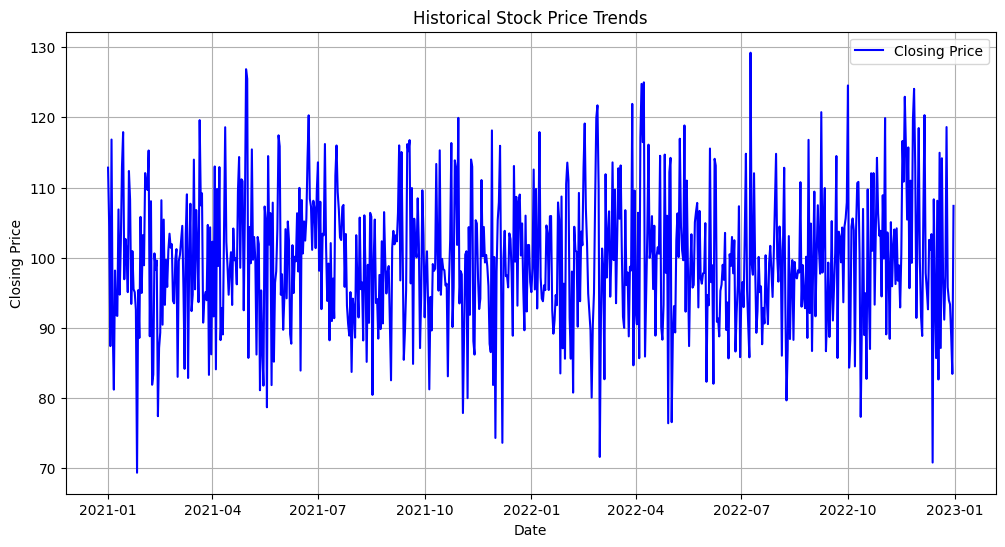

In [11]:
# Task 4: Plot line charts to visualize historical stock price trends.
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Closing_Price'], label='Closing Price', color='blue')
plt.title('Historical Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

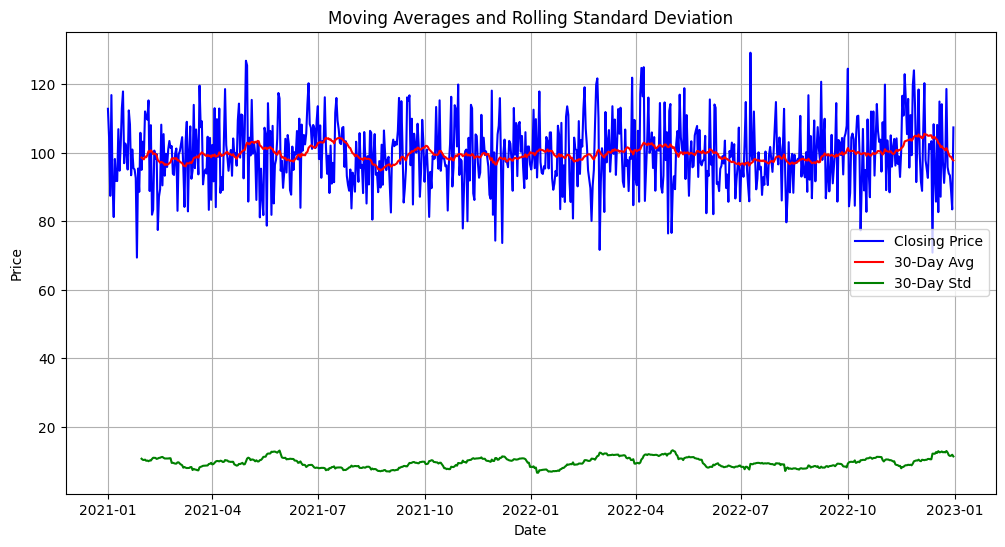

In [12]:
# Task 5: Calculate and plot moving averages to identify trends.
rolling_mean = df['Closing_Price'].rolling(window=30).mean()  # 30-day moving average
rolling_std = df['Closing_Price'].rolling(window=30).std()  # 30-day rolling standard deviation

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Closing_Price'], label='Closing Price', color='blue')
plt.plot(df['Date'], rolling_mean, label='30-Day Avg', color='red')
plt.plot(df['Date'], rolling_std, label='30-Day Std', color='green')
plt.title('Moving Averages and Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

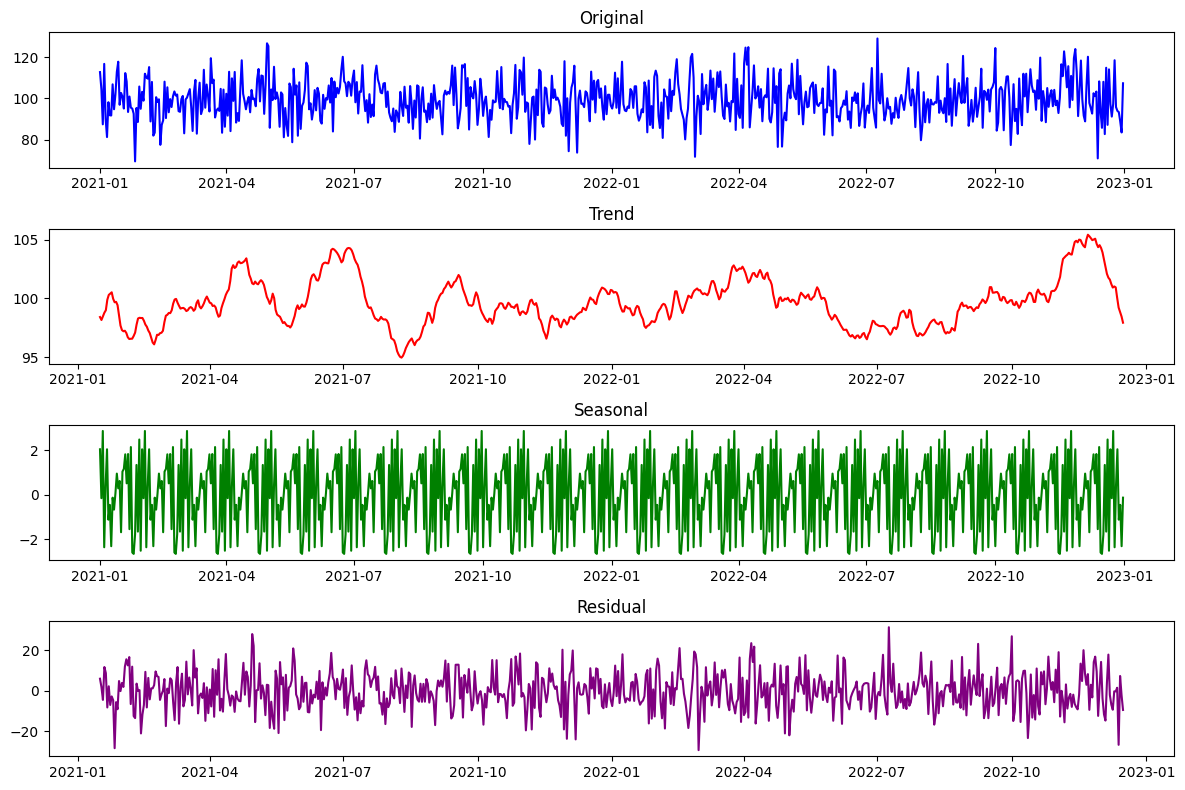

In [13]:
# Task 6: Perform seasonality analysis.
decomposition = seasonal_decompose(df['Closing_Price'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Date'], df['Closing_Price'], label='Original', color='blue')
plt.title('Original')
plt.subplot(412)
plt.plot(df['Date'], trend, label='Trend', color='red')
plt.title('Trend')
plt.subplot(413)
plt.plot(df['Date'], seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.subplot(414)
plt.plot(df['Date'], residual, label='Residual', color='purple')
plt.title('Residual')
plt.tight_layout()
plt.show()


In [14]:
# Task 7: Analyze the correlation between stock prices and other variables.
correlation = df['Closing_Price'].corr(df['Volume'])
print(f"Correlation between Closing Price and Volume: {correlation:.2f}")

Correlation between Closing Price and Volume: -0.00


In [18]:
# Task 8: Use ARIMA models to forecast future stock prices.
# For simplicity, we'll use a basic ARIMA model.
# Fit an Exponential Smoothing model (adjust the parameters as needed)
model = ExponentialSmoothing(df['Closing_Price'], trend='add', seasonal='add', seasonal_periods=30)
model_fit = model.fit()

In [19]:
# Forecast future stock prices
forecast = model_fit.forecast(steps=30)

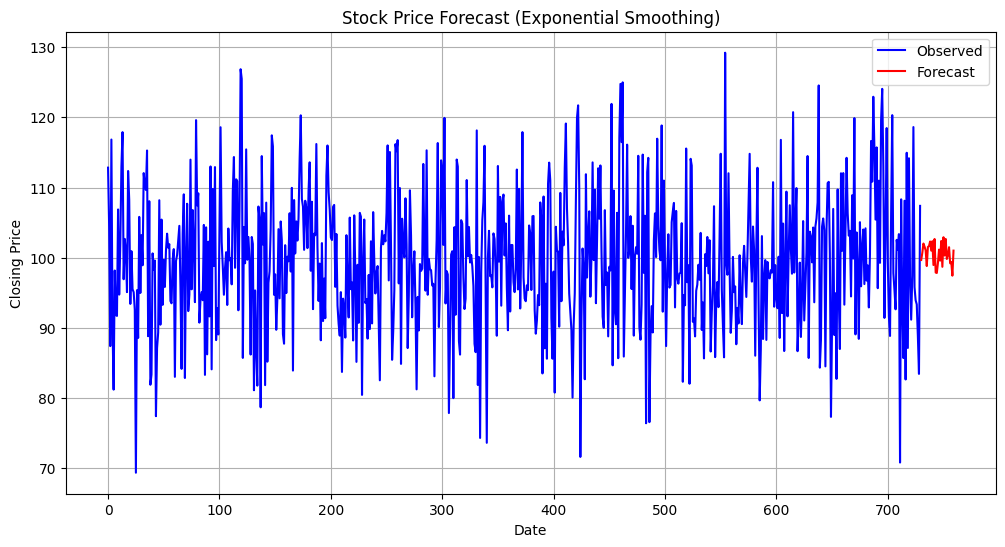

In [22]:
# Plot the observed and forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Closing_Price'], label='Observed', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Stock Price Forecast (Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()